# Week 3 ‒ 클로젯셰어 데이터를 이용해서 신규가입자 특성 파악하기

## 필수분석
<b>1. 구매 소요 시간 분석<br></b>

1-1. 가입일로부터 구매일까지 전환된 소요시간 분석
- 최근 3개월 전체 분석 / 각 월 별 분석
- 분기 경향 / 월 별 변동사항 확인 -> 트렌드 분석
ex. 가입 1일 이내 전환 유저 : 10% -> 15% 상승 성과


<b>2. 구매 상품 트렌드 분석<br></b>

2-1. 유저당 주문 수량 분석
- 최근 3개월 전체 분석 / 각 월 별 분석
- 분기 경향 / 월 별 변동사항 확인 -> 트렌드 분석

2-2. 주문 아이템 분석<br>
- 브랜드 별 선호도, 아이템 카테고리별 선호도 분석
- 신규 유저들의 구매 트렌드 파악


<b>3. 분석 내용 토대로 인사이트 도출<br></b>

3-1. 분석 내용 도식화
- 1~2의 분석 내용 종합 및 도식화 (표 또는 그래프)
- 유사성을 갖는 결과에 대하여 그룹화

3-2. 인사이트 도출
- 해당 결과를 통해 나타나는 사항 정리
- 인사이트 도출 혹은 새로운 제안사항 전달 (없을 시 진행하지 않아도 무방)

## 추가분석
<b>1. 분석 결과물 – AARRR에 기반한 분석</b>
- 클로젯셰어 서비스에 대한 AARRR에 기반한 분석(셰어러 입장에서)
- 클로젯셰어 서비스에 대한 AARRR에 기반한 분석(구매자 입장에서)<br>

<b>2. 분석 결과물 2 - 유저별 그룹핑(코호트)에 기반한 분석</b><br>

<b>3. 분석 결과물 3 – 특정 브랜드/특정 아이템에 대해 수요가 집중되는 경향성이 있는지 분석</b>

## 컬럼 설명
- brandnm : 아이템 브랜드명
- goodsnm : 아이템 명
- user : 개별 유저 식별 값
- reg_date : 개별 유저 가입일
- order_date : 아이템 주문일
- p_type : 주문 상품 종류 (7days (7일권) / 4days (4일권))
- sub_type : 주문 상품 카테고리 (BA – 가방 / O – 아우터 / D – 드레스 / T – 상의 / B – 하의 / TP– 투피스)
- app_yn : 어플리케이션 사용 여부 (Y – 어플리케이션 사용 / (공백) – 어플리케이션 미사용)

# 데이터 탐색

## 데이터 불러오기

In [389]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [390]:
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

pd.options.display.float_format = '{:,.1f}'.format
pd.options.display.max_colwidth = 99
pd.options.display.max_columns = 99
np.random.seed(42)

In [391]:
df = pd.read_excel('클로젯셰어_과제DB 대체 자료.xlsx').rename(columns=str.lower)
df

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y


## 기본정보 확인

In [392]:
df.describe()

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
count,1442,1471,1471,1466,1471,1471,1471,1295
unique,245,979,1234,368,90,2,6,1
top,Gucci,chevron quilted cross bag black,a1149461,2021-03-16 00:00:00,2021-03-24 00:00:00,4days,BA,Y
freq,232,23,11,44,47,894,692,1295
first,NaN,NaN,NaN,2017-06-24 00:00:00,2021-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-03-31 00:00:00,2021-03-31 00:00:00,NaN,NaN,NaN


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1442 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   user        1471 non-null   object        
 3   reg_date    1466 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1295 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


In [394]:
for col in df.columns:
    print(f"Column명: {col}")
    print(f"Unique값: {df[col].nunique()}")
    print()

Column명: brandnm
Unique값: 245

Column명: goodsnm
Unique값: 979

Column명: user
Unique값: 1234

Column명: reg_date
Unique값: 368

Column명: order_date
Unique값: 90

Column명: p_type
Unique값: 2

Column명: sub_type
Unique값: 6

Column명: app_yn
Unique값: 1



In [395]:
for col in df[['brandnm', 'sub_type']]:
    print(f"Column명: {col}")
    print(f"Unique값: {df[col].unique()}")
    print()

Column명: brandnm
Unique값: ['Gucci' 'El estilo de Claire' 'Danha' 'Burberry London' 'Prada'
 'Max Mara' 'Molliolli' 'Sandro' 'Louis Vuitton' 'Tory Burch' 'Chloe'
 'Time' 'The Izzat' 'Mojosphine' 'Ted Baker' '& Other Stories' 'Fendi'
 'Balmain' 'Celine' 'Burberry' 'Chanel' 'Dior' 'Bottega Veneta'
 'Plastic Island' 'Reneevon' 'Sorry Too Much Love' 'Saint Laurent'
 'Miu Miu' 'Yves Saint Laurent' 'Zooc' 'Vivienne Westwood'
 'Maison Kitsune' 'Margarin fingers' 'The Tint' 'Love Moschino' 'Michaa'
 'Vivienne Westwood Red Label' 'MSGM' 'Christian Dior' 'It michaa' 'SJSJ'
 'Amsale' 'Imvely' 'Chi Chi London' 'Maje' 'Biker Starlet' 'Thom Browne'
 'Jill By Jill Stuart' 'Comme des Garcons' 'Nain' 'Dolce & Gabbana'
 'Givenchy' 'Salvatore Ferragamo' 'Andersen-Andersen' 'A.P.C.'
 'Self-portrait' 'Sonia Rykiel' 'Diane von Furstenberg' 'Hugo Boss'
 'Baum Und Pferdgarten' 'BCBG' 'Lmml Studio' 'Nike' 'Not Your Rose' nan
 'Jigott' 'Escada' 'Diagonal' 'System' 'On&On' 'Lucky Chouette'
 'The Clozet' 'Allen.O'

In [396]:
df.isnull().sum()

brandnm        29
goodsnm         0
user            0
reg_date        5
order_date      0
p_type          0
sub_type        0
app_yn        176
dtype: int64

### ⚡<b>데이터셋 이해</b>⚡
- 1234명 유저가 2021-01-01~2021-03-31 기간에 서비스를 이용한 내역
- 가입일은 2017-06-24~2021-03-31일 기간에 걸쳐 분포
- 6개 카테고리에 걸쳐 245개 브랜드, 979개 제품이 대여됨
- 결측치가 있는 brandnm, reg_date, app_yn 컬럼에 대한 처리 필요

## brandnm이 결측치인 경우

In [397]:
df[df['brandnm'].isnull()].head(10)

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
146,NaN,feminine military blouse & high waist wide slacks,a1144948,2021-01-30,2021-01-30,4days,TP,Y
147,NaN,button basic pattern doublebreasted-jacket skyblue & slit basic pattern skirt skyblue,a170041,2020-01-01,2021-01-30,4days,TP,Y
160,NaN,lace point shirring blouse pink & lace detail long mermaid skirt,a1141009,2021-01-04,2021-01-28,4days,TP,Y
220,NaN,printing pattern hoodie grey & pocket basic pattern jogger-pants grey,a1144470,2021-01-25,2021-01-26,4days,TP,Y
267,NaN,button basic pattern jacket black & pocket basic pattern slacks black,a121913,2019-05-05,2021-01-21,4days,TP,Y
282,NaN,buckle shirt & embroidery lace skirt charcoal,a1132297,2020-11-22,2021-01-21,7days,TP,Y
285,NaN,button tweed pattern doublebreasted-coat multi & tweed pattern skirt multi,a1127979,2020-10-31,2021-01-21,7days,TP,Y
329,NaN,long sleeve rib t-shirt & check pattern square neck dress,a1134915,2020-12-03,2021-01-19,7days,TP,NaN
342,NaN,cutout neck knit & color pleats belt skirt,a1141257,2021-01-05,2021-01-19,4days,TP,Y
368,NaN,El estilo de Claire - neoprene botanical print top_pleats fake leather skirt ash,a1107090,2020-07-03,2021-01-17,4days,TP,Y


### ⚡<b>처리방법</b>⚡
- brandnm 컬럼의 null값인 경우는 sub_type이 투피스(TP)인 경우에 해당하며, goodsnm 컬럼에 2개 제품명이 &으로 연결되어 있음
- 홈페이지 검색시 2개의 brandnm이 조회됨 -> 크롤링 방법을 찾거나 수기로 정보를 가져올 수 있을 것으로 보임

## reg_date이 결측치인 경우

In [398]:
# reg_date 컬럼의 null값 확인
df[df['reg_date'].isnull()]

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
265,Gucci,mamont chain bag red,a1144008,NaT,2021-01-21,7days,BA,Y
351,Lanvin,banding point jumper skyblue,a1142855,NaT,2021-01-18,7days,O,NaN
564,Gucci,leather point cross bag,a1146490,NaT,2021-02-18,4days,BA,Y
746,Fendi,monogram zucchino shoulder bag,a1145478,NaT,2021-02-04,4days,BA,NaN
1254,Fendi,back to school bag 1,a1149094,NaT,2021-03-12,7days,BA,Y


In [399]:
# 주어진 데이터 인덱스 기준으로는 결측치 앞뒤 reg_date 데이터에 일정한 규칙 보이지 않음
reg_date_null = df[df['reg_date'].isnull()].index.tolist()
for i in reg_date_null:
    pre_con = df.loc[i-2:i+2,['user', 'reg_date','order_date']]
    print(pre_con)

         user   reg_date order_date
263  a1144042 2021-01-22 2021-01-22
264  a1141954 2021-01-10 2021-01-22
265  a1144008        NaT 2021-01-21
266   a186345 2020-03-04 2021-01-21
267   a121913 2019-05-05 2021-01-21
         user   reg_date order_date
349   a152462 2019-10-30 2021-01-18
350  a1141029 2021-01-04 2021-01-18
351  a1142855        NaT 2021-01-18
352  a1143692 2021-01-18 2021-01-18
353  a1143683 2021-01-18 2021-01-18
         user   reg_date order_date
562  a1126491 2020-10-24 2021-02-18
563  a1145696 2021-02-06 2021-02-18
564  a1146490        NaT 2021-02-18
565  a1146744 2021-02-17 2021-02-18
566  a1145314 2021-02-03 2021-02-18
         user   reg_date order_date
744  a1145073 2021-02-01 2021-02-04
745  a1145436 2021-02-04 2021-02-04
746  a1145478        NaT 2021-02-04
747  a1145479 2021-02-04 2021-02-04
748  a1102098 2020-05-29 2021-02-04
          user   reg_date order_date
1252  a1147974 2021-03-02 2021-03-12
1253  a1148861 2021-03-10 2021-03-12
1254  a1149094        NaT

In [400]:
df.groupby('user')['reg_date'].agg('min').reset_index().sort_values(by = 'reg_date')

,user,reg_date
1057,a11612,2017-06-24
1063,a11803,2017-07-02
1083,a13637,2018-03-09
1085,a13741,2018-03-20
1091,a13934,2018-03-27
...,...,...
284,a1142855,NaT
330,a1144008,NaT
476,a1145478,NaT
558,a1146490,NaT


In [401]:
# 유저 일련번호가 reg_date 순으로 부여되었는지 확인
user_check = df.groupby('user')['reg_date'].agg('min').reset_index().sort_values(by = 'reg_date')
user_check['user_num'] = user_check['user'].str[1:].astype(int)
user_check

,user,reg_date,user_num
1057,a11612,2017-06-24,11612
1063,a11803,2017-07-02,11803
1083,a13637,2018-03-09,13637
1085,a13741,2018-03-20,13741
1091,a13934,2018-03-27,13934
...,...,...,...
284,a1142855,NaT,1142855
330,a1144008,NaT,1144008
476,a1145478,NaT,1145478
558,a1146490,NaT,1146490


In [402]:
# 유저 아이디의 일련번호는 reg_date 순으로 부여된 것으로 보이나 중간중간 끝자리 숫자가 누락된 데이터가 확인됨

user_check_list = []
print('Conseq 일련번호 누락으로 추정되는 건')
for i in range(0, user_check.shape[0]):
    try:
        if user_check['user_num'][i] > user_check['user_num'][i+1]:
            user_check_list.append('a')
            print(f'Prev: {user_check["user_num"][i]} | Conseq: {user_check["user_num"][i+1]}')
        else:
            user_check_list.append('b')
    except:
        pass

print("")
print('등록일 기준 오름차순 정렬시 유저 아이디 일련번호 비교')
print(f'Prev user_num > Conseq user_num : {user_check_list.count("a")}')
print(f'Prev user_num < Conseq user_num : {user_check_list.count("b")}')

Conseq 일련번호 누락으로 추정되는 건
Prev: 1102098 | Conseq: 110231
Prev: 1102611 | Conseq: 110269
Prev: 1107269 | Conseq: 110727
Prev: 1109404 | Conseq: 110947
Prev: 1110250 | Conseq: 111030
Prev: 1110928 | Conseq: 111093
Prev: 1112718 | Conseq: 111344
Prev: 1114519 | Conseq: 111461
Prev: 1119556 | Conseq: 112000
Prev: 1120886 | Conseq: 112106
Prev: 1123164 | Conseq: 112319
Prev: 1136719 | Conseq: 113690
Prev: 1143269 | Conseq: 114327
Prev: 1149833 | Conseq: 114984
Prev: 1151564 | Conseq: 115159
Prev: 116095 | Conseq: 11612
Prev: 117741 | Conseq: 11803
Prev: 134855 | Conseq: 13637
Prev: 136403 | Conseq: 13741
Prev: 139044 | Conseq: 13934
Prev: 140509 | Conseq: 14083
Prev: 142390 | Conseq: 14279
Prev: 154850 | Conseq: 15568
Prev: 161609 | Conseq: 16232
Prev: 168919 | Conseq: 16928
Prev: 170041 | Conseq: 17062
Prev: 185643 | Conseq: 18567
Prev: 186345 | Conseq: 18660
Prev: 191314 | Conseq: 19187
Prev: 198621 | Conseq: 19897
Prev: 199421 | Conseq: 19983

등록일 기준 오름차순 정렬시 유저 아이디 일련번호 비교
Prev user_num >

In [403]:
# 유저 일련번호가 끝자리 숫자가 누락된 것으로 추정되는 건은 끝에 0을 붙여도 reg_date 순으로 부여된 순서는 유지됨
for i in range(0, user_check.shape[0]):
    try:
        if user_check['user_num'][i] > user_check['user_num'][i+1]:
            if user_check['user_num'][i].astype(str)[:-1] == user_check['user_num'][i+1].astype(str):
                print('a')
    except:
        pass

In [404]:
user_check['user'] + str(0)

1057      a116120
1063      a118030
1083      a136370
1085      a137410
1091      a139340
          ...    
284     a11428550
330     a11440080
476     a11454780
558     a11464900
826     a11490940
Name: user, Length: 1234, dtype: object

In [405]:
for i in range(0, user_check.shape[0]):
    try:
        if user_check['user_num'][i] > user_check['user_num'][i+1]:
            user_check['user_new'][i+1] = str(user_check['user_num'][i+1]) + str(0)
        else:
            user_check['user_new'][i+1] = user_check['user'][i+1]
    except:
        pass

user_check

,user,reg_date,user_num
1057,a11612,2017-06-24,11612
1063,a11803,2017-07-02,11803
1083,a13637,2018-03-09,13637
1085,a13741,2018-03-20,13741
1091,a13934,2018-03-27,13934
...,...,...,...
284,a1142855,NaT,1142855
330,a1144008,NaT,1144008
476,a1145478,NaT,1145478
558,a1146490,NaT,1146490


In [406]:
user_check_final = user_check.sort_values(by = 'user_num')
user_check_final

,user,reg_date,user_num
1057,a11612,2017-06-24,11612
1063,a11803,2017-07-02,11803
1083,a13637,2018-03-09,13637
1085,a13741,2018-03-20,13741
1091,a13934,2018-03-27,13934
...,...,...,...
1048,a1151479,2021-03-31,1151479
1049,a1151481,2021-03-31,1151481
1050,a1151496,2021-03-31,1151496
1051,a1151499,2021-03-31,1151499


In [407]:
reg_date_null = user_check_final[user_check_final['reg_date'].isnull()].index.tolist()
for i in reg_date_null:
    pre_con = user_check_final.loc[i-2:i+2,['user', 'reg_date','user_num']]
    print(pre_con)

         user   reg_date  user_num
282  a1142838 2021-01-13   1142838
283  a1142841 2021-01-13   1142841
284  a1142855        NaT   1142855
285  a1142902 2021-01-14   1142902
286  a1142914 2021-01-14   1142914
         user   reg_date  user_num
328  a1143946 2021-01-21   1143946
329  a1143948 2021-01-21   1143948
330  a1144008        NaT   1144008
331  a1144011 2021-01-21   1144011
332  a1144042 2021-01-22   1144042
         user   reg_date  user_num
474  a1145467 2021-02-04   1145467
475  a1145471 2021-02-04   1145471
476  a1145478        NaT   1145478
477  a1145479 2021-02-04   1145479
478  a1145482 2021-02-04   1145482
         user   reg_date  user_num
556  a1146476 2021-02-15   1146476
557  a1146489 2021-02-15   1146489
558  a1146490        NaT   1146490
559  a1146514 2021-02-15   1146514
560  a1146516 2021-02-15   1146516
         user   reg_date  user_num
824  a1149051 2021-03-12   1149051
825  a1149062 2021-03-12   1149062
826  a1149094        NaT   1149094
827  a1149124 2021-0

In [408]:
for i in range(0, user_check_final.shape[0]):
    if pd.isnull(user_check_final['reg_date'][i]):
        user_check_final.loc[i, 'reg_date'] = user_check_final.loc[i-1, 'reg_date']
user_check_final[user_check_final.index.isin(reg_date_null)]

,user,reg_date,user_num
284,a1142855,2021-01-13,1142855
330,a1144008,2021-01-21,1144008
476,a1145478,2021-02-04,1145478
558,a1146490,2021-02-15,1146490
826,a1149094,2021-03-12,1149094


In [409]:
# 전처리 단계에서 df 데이터셋에 머지 예정
user_reg_date = user_check_final[['user', 'reg_date']]
user_reg_date

,user,reg_date
1057,a11612,2017-06-24
1063,a11803,2017-07-02
1083,a13637,2018-03-09
1085,a13741,2018-03-20
1091,a13934,2018-03-27
...,...,...
1048,a1151479,2021-03-31
1049,a1151481,2021-03-31
1050,a1151496,2021-03-31
1051,a1151499,2021-03-31


### ⚡<b>처리방법</b>⚡
- 유저 아이디 일련번호는 reg_date 기준으로 부여된 것으로 보임
- 유저 아이디의 일련번호를 기준으로 데이터를 정렬하여 reg_dat가 누락된 건의 전후 reg_date가 같으면 해당 날짜로, 전후 데이터의 reg_date가 다른 경우 둘중 한 날짜로 대체 처리

## user & order_date

In [410]:
# user 컬럼과 order_date 컬럼 관계 확인
user_order_date = df.groupby('user')['order_date'].agg(['max','min']).reset_index()
user_order_date

,user,max,min
0,a1100548,2021-03-31,2021-03-31
1,a1100887,2021-03-29,2021-03-29
2,a1101514,2021-02-05,2021-02-05
3,a1101645,2021-02-23,2021-02-23
4,a1102068,2021-03-04,2021-03-04
...,...,...,...
1229,a198621,2021-01-21,2021-01-21
1230,a19897,2021-02-16,2021-02-16
1231,a199351,2021-01-06,2021-01-06
1232,a199421,2021-02-22,2021-02-22


In [411]:
# 유저마다 주문한 날짜가 1:1로 매칭됨
for i in range(0, user_order_date.shape[0]):
    if user_order_date.loc[i, 'max'] != user_order_date.loc[i, 'min']:
        print('Multiple order dates exist for a user')
    else:
        pass

### ⚡<b>인사이트</b>⚡
- 신규가입 유저에 대한 3개월치 데이터로, 유저마다 order_date이 1:1로 매칭됨
- 주어진 데이터셋에서는 재구매 관련 분석을 진행할 수 없음

## user & goodsnm

In [412]:
# user 컬럼과 goodsnm 컬럼 관계 확인
user_goodsnm = df.groupby('user')['goodsnm'].agg(['count']).reset_index().sort_values(by = 'count', ascending = False)
user_goodsnm

,user,count
851,a1149461,11
868,a1149583,10
275,a1142677,9
317,a1143701,7
1207,a189404,7
...,...,...
444,a1145218,1
443,a1145217,1
442,a1145206,1
441,a1145200,1


In [413]:
# 전체 1234명 유저 중 88.7%는 1개 아이템만 주문
user_count = user_goodsnm.loc[user_goodsnm['count']==1,'user'].count()
print(f"1개 아이템만 주문한 유저: {user_count}명, {round(user_count / user_goodsnm.shape[0] * 100, 1)}%")

1개 아이템만 주문한 유저: 1095명, 88.7%


<AxesSubplot:>

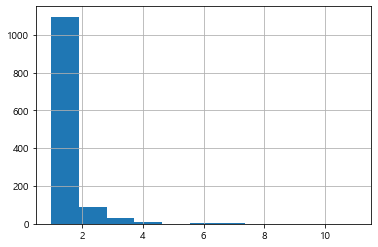

In [414]:
user_goodsnm['count'].hist(bins = 11)

### ⚡<b>인사이트</b>⚡
- 데이터셋에 정보가 있는 1234명의 유저 중 88.7%에 해당하는 1095명은 1개 아이템만을 주문하였음
- 장바구니에 함께 담은 제품을 살펴보는 연관분석을 진행할 수 있는 대상은 139명으로 제한적임

# 데이터 전처리

## reg_date 결측치

In [415]:
# reg_date의 null값 user_reg_date 정보로 대체
df = df.merge(user_reg_date, on = 'user', how = 'left').drop('reg_date_x', axis = 1).rename(columns = {'reg_date_y' : 'reg_date'})
df

,brandnm,goodsnm,user,order_date,p_type,sub_type,app_yn,reg_date
0,Gucci,flower dionysus shoulder bag beige,a161237,2021-01-15,7days,BA,Y,2019-12-06
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-15,4days,O,NaN,2021-01-02
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-15,4days,B,NaN,2021-01-02
3,Danha,graphics pattern top pink,a1140859,2021-01-15,4days,T,NaN,2021-01-02
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-15,7days,O,Y,2021-01-01
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2021-03-01,7days,BA,Y,2019-04-10
1467,Prada,saffiano lux M gray,a1146069,2021-03-01,7days,BA,Y,2021-02-11
1468,Burberry,basic pattern sweater beige,a1147848,2021-03-01,7days,T,Y,2021-02-28
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-03-01,7days,T,Y,2021-02-28


## app_yn 결측치

In [416]:
# app_yn 컬럼의 null값 'N'으로 대체
df.loc[df['app_yn'].isnull(), 'app_yn'] = 'N'
df

,brandnm,goodsnm,user,order_date,p_type,sub_type,app_yn,reg_date
0,Gucci,flower dionysus shoulder bag beige,a161237,2021-01-15,7days,BA,Y,2019-12-06
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-15,4days,O,N,2021-01-02
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-15,4days,B,N,2021-01-02
3,Danha,graphics pattern top pink,a1140859,2021-01-15,4days,T,N,2021-01-02
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-15,7days,O,Y,2021-01-01
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2021-03-01,7days,BA,Y,2019-04-10
1467,Prada,saffiano lux M gray,a1146069,2021-03-01,7days,BA,Y,2021-02-11
1468,Burberry,basic pattern sweater beige,a1147848,2021-03-01,7days,T,Y,2021-02-28
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-03-01,7days,T,Y,2021-02-28


## 필요컬럼 추가

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1442 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   user        1471 non-null   object        
 3   order_date  1471 non-null   datetime64[ns]
 4   p_type      1471 non-null   object        
 5   sub_type    1471 non-null   object        
 6   app_yn      1471 non-null   object        
 7   reg_date    1471 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 103.4+ KB


In [418]:
# 가입 정보 관련 날짜 변수 추가 
df['reg_year']=df['reg_date'].dt.year
df['reg_month']=df['reg_date'].dt.month
df['reg_yearmonth']=df['reg_date'].dt.strftime('%Y-%m')
df['reg_dayofweek']=df['reg_date'].dt.dayofweek
df['order_month']=df['order_date'].dt.month
df['order_week']=df['order_date'].dt.week
df['order_dayofweek']=df['order_date'].dt.dayofweek

In [419]:
# 2021 top 10 list
luxury_list=['Gucci','Louis Vuitton','Cartier','Chanel','Hermes','Ferrari','Rolex','Dior','Christian Dior','COACH','Estee Lauder','Tiffany & Co.',
'Guerlain','Burberry','Prada','Lancôme','Omega','Clarins','Bulgari','Moncler','Saint Laurent','SK-II','McLaren','TAG Heuer','Givenchy','Lamborghini','Armani','Bottega Veneta','Rolls- Royce',
'Bentley','Aston Martin','Loewe','Maserati','Van Cleef & Arpels','Valentino','Salvatore Ferragamo','Shiseido','Sulwhasoo','Tissot','Versace','Bobbi Brown','Montblanc','Tom Ford','Longines','Cle de Peau Beaute','Jaeger-LeCoultre',
'Celine','Dolce & Gabbana','Miu Miu','Fendi']

luxury_list_lower = []
for item in luxury_list:
    item = item.lower()
    luxury_list_lower.append(item)
    
luxury_list_lower[:5]

['gucci', 'louis vuitton', 'cartier', 'chanel', 'hermes']

In [420]:
# brandnm luxury 
df['brandnm_luxury']=np.where(df['brandnm'].str.lower().isin(luxury_list_lower), 1,0)
df.head()

,brandnm,goodsnm,user,order_date,p_type,sub_type,app_yn,reg_date,reg_year,reg_month,reg_yearmonth,reg_dayofweek,order_month,order_week,order_dayofweek,brandnm_luxury
0,Gucci,flower dionysus shoulder bag beige,a161237,2021-01-15,7days,BA,Y,2019-12-06,2019,12,2019-12,4,1,2,4,1
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-15,4days,O,N,2021-01-02,2021,1,2021-01,5,1,2,4,0
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-15,4days,B,N,2021-01-02,2021,1,2021-01,5,1,2,4,0
3,Danha,graphics pattern top pink,a1140859,2021-01-15,4days,T,N,2021-01-02,2021,1,2021-01,5,1,2,4,0
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-15,7days,O,Y,2021-01-01,2021,1,2021-01,4,1,2,4,0


# EDA

## 구매전환 소요시간 분석

- 최근 3개월 전체 분석 / 각 월별 분석
- 월별 변동사항 확인 -> 트렌드 분석 (ex. 가입 1일 이내 전환 유저 : 10% -> 15% 상승 성과)

In [421]:
# 필요 컬럼 생성
# lag : 구매일 - 가입일 간 소요일수 계산
# lag_month : lag를 30일로 나누어 소요월 계산
# order_month : 주문월 표시

df['lag'] = (df['order_date'] - df['reg_date']).dt.days
df['lag_month'] = df['lag']/30
df['order_month'] = df['order_date'].dt.month
df

,brandnm,goodsnm,user,order_date,p_type,sub_type,app_yn,reg_date,reg_year,reg_month,reg_yearmonth,reg_dayofweek,order_month,order_week,order_dayofweek,brandnm_luxury,lag,lag_month
0,Gucci,flower dionysus shoulder bag beige,a161237,2021-01-15,7days,BA,Y,2019-12-06,2019,12,2019-12,4,1,2,4,1,406,13.5
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-15,4days,O,N,2021-01-02,2021,1,2021-01,5,1,2,4,0,13,0.4
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-15,4days,B,N,2021-01-02,2021,1,2021-01,5,1,2,4,0,13,0.4
3,Danha,graphics pattern top pink,a1140859,2021-01-15,4days,T,N,2021-01-02,2021,1,2021-01,5,1,2,4,0,13,0.4
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-15,7days,O,Y,2021-01-01,2021,1,2021-01,4,1,2,4,0,14,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2021-03-01,7days,BA,Y,2019-04-10,2019,4,2019-04,2,3,9,0,0,691,23.0
1467,Prada,saffiano lux M gray,a1146069,2021-03-01,7days,BA,Y,2021-02-11,2021,2,2021-02,3,3,9,0,1,18,0.6
1468,Burberry,basic pattern sweater beige,a1147848,2021-03-01,7days,T,Y,2021-02-28,2021,2,2021-02,6,3,9,0,1,1,0.0
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-03-01,7days,T,Y,2021-02-28,2021,2,2021-02,6,3,9,0,1,1,0.0


### 3개월 전체 데이터

In [422]:
# 구매전환 최소 소요일 : 0
# 구매전환 최대 소요일 : 1304
df_lag = df.groupby('user')['lag'].min().reset_index().sort_values(by = 'lag', ascending = False)
df_lag

,user,lag
1057,a11612,1304
1063,a11803,1298
1085,a13741,1107
1083,a13637,1090
1098,a14279,1073
...,...,...
741,a1148131,0
738,a1148115,0
737,a1148104,0
735,a1148097,0


<AxesSubplot:>

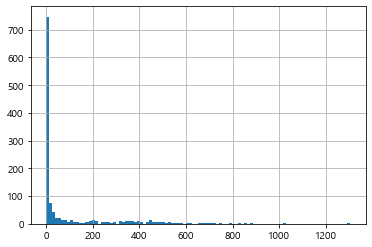

In [423]:
df_lag['lag'].hist(bins = 100)

In [424]:
# 가입일로부터 첫주문일까지 걸린 시간 lag_lvl에 6개 분류로 표기
# Sameday : 가입당일 주문 / Nextday : 가입 2일차 주문 / ~1Week : 가입 3일차 ~ 1주일 내 주문
# ~1month :가입 8일차 ~ 1개월 내 주문 / ~1year : 가입 1개월차 ~ 1년 내 주문 / 1year+ : 가입한지 1년 지나서 주문

cut_labels = ['Sameday', 'Nextday', '~1Week', '~1month', '~1year', '1year+']
cut_bins = [-1, 0, 1, 7, 30, 365, 1304]
df_lag['lag_lvl'] = pd.cut(df_lag['lag'], bins=cut_bins, labels=cut_labels)
df_lag

,user,lag,lag_lvl
1057,a11612,1304,1year+
1063,a11803,1298,1year+
1085,a13741,1107,1year+
1083,a13637,1090,1year+
1098,a14279,1073,1year+
...,...,...,...
741,a1148131,0,Sameday
738,a1148115,0,Sameday
737,a1148104,0,Sameday
735,a1148097,0,Sameday


In [425]:
df_lag_lvl = df_lag.groupby('lag_lvl')['user'].count().reset_index().rename(columns = {'user' : 'count'})
df_lag_lvl.head()

,lag_lvl,count
0,Sameday,323
1,Nextday,124
2,~1Week,245
3,~1month,149
4,~1year,241


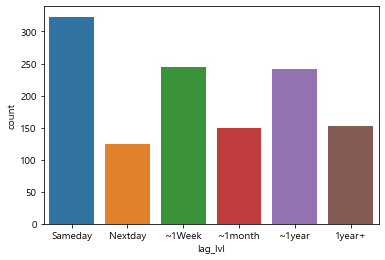

In [426]:
# 가입 당일 구매한 유저가 가장 많음 
plt.figure(figsize = (6,4))
ax = sns.barplot(x = df_lag_lvl['lag_lvl'], y = df_lag_lvl['count'])

#### ⚡<b>인사이트</b>⚡
- 전체 데이터의 구매전환 소요시간 분포를 봤을 때 당일 가입후 구매한 유저의 비중이 가장 높았음
- 구매전환 소요시간 카테고리를 어떻게 나누는 것이 가장 효율적일 추가로 고민해볼 필요가 있음

### 월별 데이터
- 월별로 lag_lvl 비율 변화 확인

In [427]:
# 사용월에 따른 lag_lvl 분포 확인
df_month = df.groupby('user')['order_month','lag'].agg({'order_month' : 'max', 'lag' : 'min'}).reset_index()
df_month

,user,order_month,lag
0,a1100548,3,319
1,a1100887,3,314
2,a1101514,2,256
3,a1101645,2,273
4,a1102068,3,279
...,...,...,...
1229,a198621,1,271
1230,a19897,2,857
1231,a199351,1,248
1232,a199421,2,294


In [428]:
# 가입일로부터 첫주문일까지 걸린 시간 lag_lvl에 6개 분류로 표기
# Sameday : 가입당일 주문 / Nextday : 가입 2일차 주문 / ~1Week : 가입 3일차 ~ 1주일 내 주문
# ~1month :가입 8일차 ~ 1개월 내 주문 / ~1year : 가입 1개월차 ~ 1년 내 주문 / 1year+ : 가입한지 1년 지나서 주문

cut_labels = ['Sameday', 'Nextday', '~1Week', '~1month', '~1year', '1year+']
cut_bins = [-1, 0, 1, 7, 30, 365, 1304]
df_month['lag_lvl'] = pd.cut(df_month['lag'], bins=cut_bins, labels=cut_labels)
df_month

,user,order_month,lag,lag_lvl
0,a1100548,3,319,~1year
1,a1100887,3,314,~1year
2,a1101514,2,256,~1year
3,a1101645,2,273,~1year
4,a1102068,3,279,~1year
...,...,...,...,...
1229,a198621,1,271,~1year
1230,a19897,2,857,1year+
1231,a199351,1,248,~1year
1232,a199421,2,294,~1year


In [429]:
df_month_lvl = df_month.groupby(['order_month','lag_lvl'])['user'].count().reset_index().rename(columns = {'user' : 'count'})
df_month_lvl

,order_month,lag_lvl,count
0,1,Sameday,56
1,1,Nextday,20
2,1,~1Week,49
3,1,~1month,61
4,1,~1year,79
5,1,1year+,46
6,2,Sameday,110
7,2,Nextday,53
8,2,~1Week,81
9,2,~1month,37


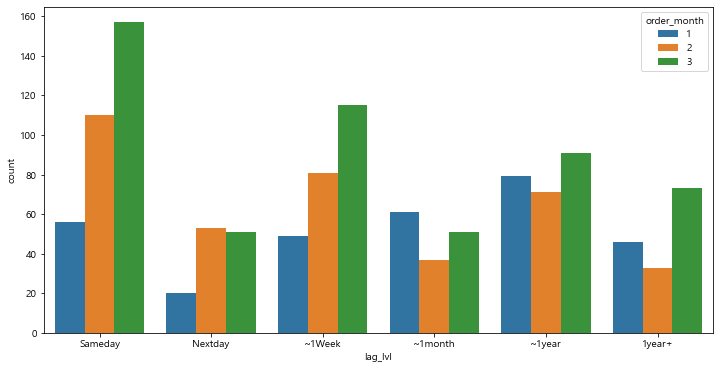

In [430]:
# 3월 구매자 중 당일가입자 비중이 1,2월에 비해 높음
plt.figure(figsize = (12,6))
g = sns.barplot(x = 'lag_lvl', y = 'count', hue = 'order_month', data = df_month_lvl)

In [431]:
df_jan_users = df.loc[df['order_month'] == 1, 'user'].tolist()
df_feb_users = df.loc[df['order_month'] == 2, 'user'].tolist()
df_mar_users = df.loc[df['order_month'] == 3, 'user'].tolist()

df_jan = df_month[df_month['user'].isin(df_jan_users)].groupby('lag_lvl')['user'].count().reset_index().rename(columns = {'user' : 'count'})
df_feb = df_month[df_month['user'].isin(df_feb_users)].groupby('lag_lvl')['user'].count().reset_index().rename(columns = {'user' : 'count'})
df_mar = df_month[df_month['user'].isin(df_mar_users)].groupby('lag_lvl')['user'].count().reset_index().rename(columns = {'user' : 'count'})

df_jan['pct'] = df_jan['count'] / np.sum(df_jan['count']) * 100
df_feb['pct'] = df_feb['count'] / np.sum(df_feb['count']) * 100
df_mar['pct'] = df_mar['count'] / np.sum(df_mar['count']) * 100

In [432]:
df_jan

,lag_lvl,count,pct
0,Sameday,56,18.0
1,Nextday,20,6.4
2,~1Week,49,15.8
3,~1month,61,19.6
4,~1year,79,25.4
5,1year+,46,14.8


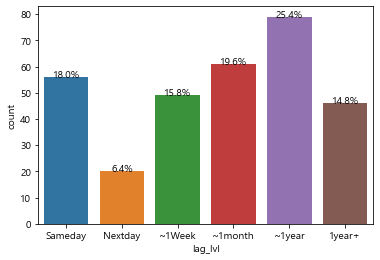

In [433]:
# 1월 주문자
g = sns.barplot(x='lag_lvl',y='count',data=df_jan)
for index, row in df_jan.iterrows():
    g.text(x = row.name, y = row['count'], s = str(round(row['pct'],1)) + str('%'), color='black', ha="center")

In [434]:
df_feb

,lag_lvl,count,pct
0,Sameday,110,28.6
1,Nextday,53,13.8
2,~1Week,81,21.0
3,~1month,37,9.6
4,~1year,71,18.4
5,1year+,33,8.6


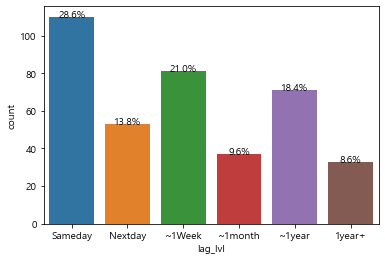

In [435]:
# 2월 주문자
g = sns.barplot(x='lag_lvl',y='count',data=df_feb)
for index, row in df_feb.iterrows():
    g.text(x = row.name, y = row['count'], s = str(round(row['pct'],1)) + str('%'), color='black', ha="center")

In [436]:
df_mar

,lag_lvl,count,pct
0,Sameday,157,29.2
1,Nextday,51,9.5
2,~1Week,115,21.4
3,~1month,51,9.5
4,~1year,91,16.9
5,1year+,73,13.6


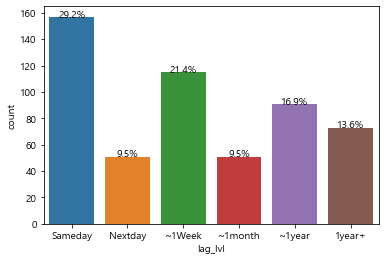

In [437]:
# 3월 주문자
g = sns.barplot(x='lag_lvl',y='count',data=df_mar)
for index, row in df_mar.iterrows():
    g.text(x = row.name, y = row['count'], s = str(round(row['pct'],1)) + str('%'), color='black', ha="center")

#### ⚡<b>인사이트</b>⚡
- 1->2->3월로 갈수록 가입당일 주문자 비율이 높아짐 (18% -> 28.6% -> 29.2%)
- 3월에 가입당일 구매를 촉진하기 위한 마케팅 활동이 있었을 수 있음

--------------------------------------------------------------------------------

## 월별 데이터 분석
- order_date 정보로 1,2,3월 구매 건을 나누어 세부내용 분석
- 분석대상 : 선호 브랜드, 선호 제품, 유저별 대여제품 건수, 주문요일, 이용권, 제품카테고리, 앱사용여부, 럭셔리 제품 여부

In [438]:
df_monthly = df.groupby('order_month')['goodsnm'].count().reset_index().rename(columns = {'goodsnm' : 'count'})
df_monthly

,order_month,count
0,1,377
1,2,455
2,3,639


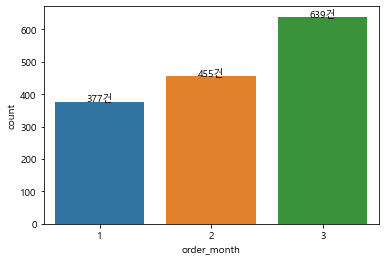

In [439]:
# 월별 대여건수는 성장추세
g = sns.barplot(x='order_month',y='count',data=df_monthly)
for index, row in df_monthly.iterrows():
    g.text(x = row.name, y = row['count'], s = str(row['count']) + str('건'), color='black', ha="center")

### 1) 월별 선호 브랜드

In [440]:
# order_month, brandnm으로 groupby
df_monthly_brand = df.groupby(['order_month', 'brandnm'])['p_type'].count().reset_index().sort_values(
    by = 'p_type', ascending = False).rename(columns = {'p_type' : 'count'})
df_monthly_brand

,order_month,brandnm,count
293,3,Gucci,101
166,2,Gucci,76
43,1,Gucci,55
266,3,Chanel,39
310,3,Louis Vuitton,39
...,...,...,...
235,2,cecilie bahnsen,1
236,2,thom browne,1
102,1,The Tint,1
238,3,A.P.C.,1


In [441]:
# 월별 대여 건수가 2 이상이었던 인기 브랜드 확인
df_jan = df_monthly_brand[df_monthly_brand['order_month'] == 1]
df_feb = df_monthly_brand[df_monthly_brand['order_month'] == 2]
df_mar = df_monthly_brand[df_monthly_brand['order_month'] == 3]

df_jan['pct'] = df_jan['count'] / np.sum(df_jan['count']) * 100
df_feb['pct'] = df_feb['count'] / np.sum(df_feb['count']) * 100
df_mar['pct'] = df_mar['count'] / np.sum(df_mar['count']) * 100

df_jan_top = df_jan[df_jan['count'] != 1]
df_feb_top = df_feb[df_feb['count'] != 1]
df_mar_top = df_mar[df_mar['count'] != 1]

In [442]:
# 1월 인기 브랜드
df_jan_top.head()

,order_month,brandnm,count,pct
43,1,Gucci,55,15.0
90,1,Saint Laurent,21,5.7
85,1,Prada,20,5.5
20,1,Chanel,14,3.8
59,1,Louis Vuitton,13,3.6


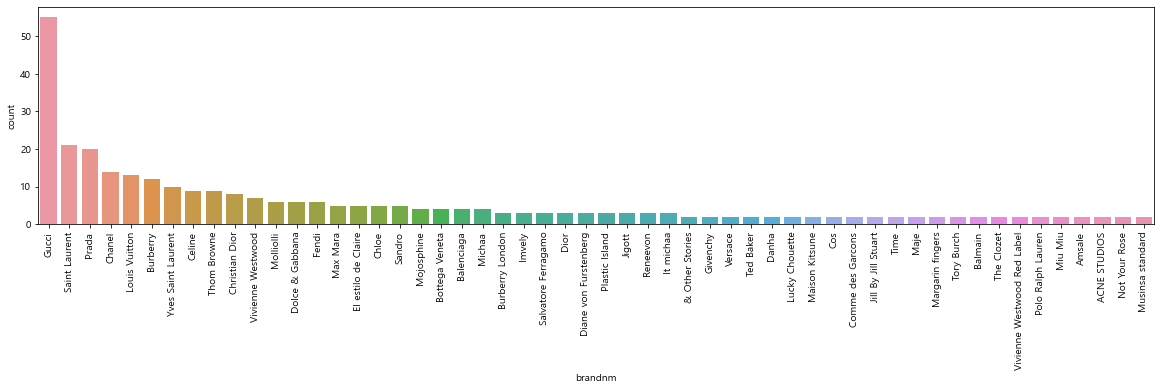

In [443]:
# 1월 인기 브랜드
plt.figure(figsize = (20,4))
plt.xticks(rotation = 90)
g = sns.barplot(x='brandnm',y='count',data=df_jan_top)

In [444]:
# 2월 인기 브랜드
df_feb_top.head()

,order_month,brandnm,count,pct
166,2,Gucci,76,17.0
143,2,Chanel,37,8.3
213,2,Saint Laurent,31,6.9
179,2,Louis Vuitton,27,6.0
204,2,Prada,23,5.1


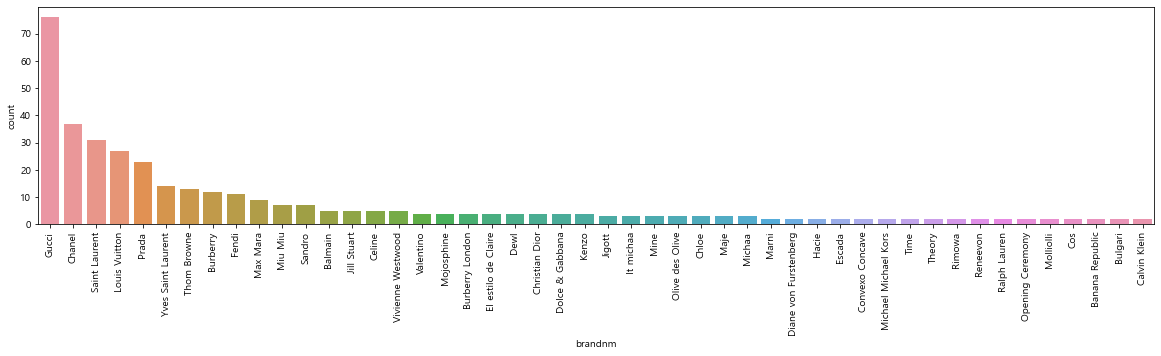

In [445]:
# 2월 인기 브랜드
plt.figure(figsize = (20,4))
plt.xticks(rotation = 90)
g = sns.barplot(x='brandnm',y='count',data=df_feb_top)

In [446]:
# 3월 인기 브랜드
df_mar_top.head()

,order_month,brandnm,count,pct
293,3,Gucci,101,16.1
266,3,Chanel,39,6.2
310,3,Louis Vuitton,39,6.2
355,3,Saint Laurent,34,5.4
259,3,Burberry,29,4.6


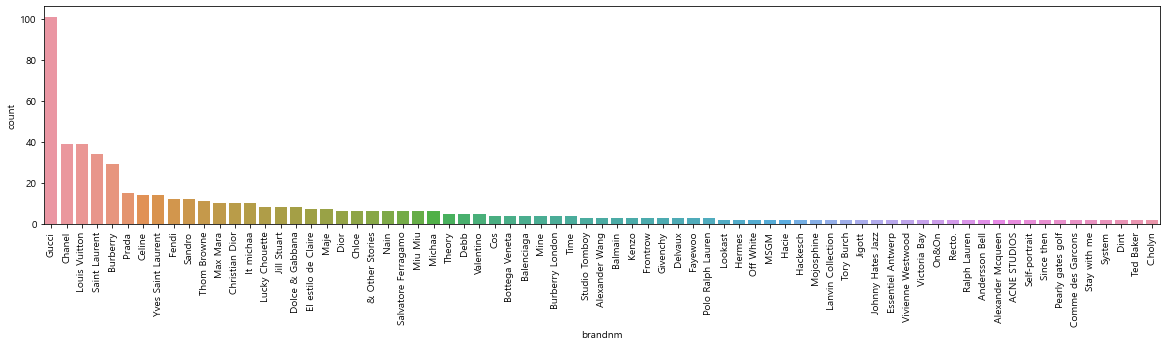

In [447]:
# 3월 인기 브랜드
plt.figure(figsize = (20,4))
plt.xticks(rotation = 90)
g = sns.barplot(x='brandnm',y='count',data=df_mar_top)

In [448]:
print(f'1월에 2건 이상 대여된 브랜드 : {df_jan_top.shape[0]}개')
print(f'2월에 2건 이상 대여된 브랜드 : {df_feb_top.shape[0]}개')
print(f'3월에 2건 이상 대여된 브랜드 : {df_mar_top.shape[0]}개')

1월에 2건 이상 대여된 브랜드 : 54개
2월에 2건 이상 대여된 브랜드 : 48개
3월에 2건 이상 대여된 브랜드 : 73개


#### ⚡<b>인사이트</b>⚡
- 매월 Gucci가 전체 대여건수의 15~17%를 차지하며 압도적인 1위
- Top 5에 Chanel, Louis Vuitton, Saint Laurent는 항상 포함, Burberry, Prada는 대체로 포함
- 대여 건수가 2 이상이었던 브랜드 개수는 1->2월에 줄어들었다가 3월에 대폭 늘어남
- 클로젯셰어에서 대여되는 브랜드 종류가 다양해지고 있다고 유추해볼 수 있음

### 2) 월별 선호 제품

In [449]:
# order_month, goodsnm으로 groupby
df_monthly_goods = df.groupby(['order_month', 'goodsnm', 'sub_type'])['p_type'].count().reset_index().sort_values(
    by = 'p_type', ascending = False).rename(columns = {'p_type' : 'count'})
df_monthly_goods

,order_month,goodsnm,sub_type,count
861,3,chevron quilted cross bag black,BA,9
867,3,classic clutch black,BA,7
93,1,chevron quilted cross bag black,BA,7
446,2,chevron quilted cross bag black,BA,7
790,3,boy chanel clutch black,BA,6
...,...,...,...,...
426,2,button stripe pattern shirts mint,T,1
428,2,button stripe pattern sweater mustard,T,1
429,2,button stripe pattern wool cardigan black,O,1
430,2,cabas monogram two way bag beige,BA,1


In [450]:
# 월별 대여 건수가 2 이상이었던 인기 제품 확인
df_jan = df_monthly_goods[df_monthly_goods['order_month'] == 1]
df_feb = df_monthly_goods[df_monthly_goods['order_month'] == 2]
df_mar = df_monthly_goods[df_monthly_goods['order_month'] == 3]

df_jan['pct'] = df_jan['count'] / np.sum(df_jan['count']) * 100
df_feb['pct'] = df_feb['count'] / np.sum(df_feb['count']) * 100
df_mar['pct'] = df_mar['count'] / np.sum(df_mar['count']) * 100

df_jan_top = df_jan[df_jan['count'] != 1]
df_feb_top = df_feb[df_feb['count'] != 1]
df_mar_top = df_mar[df_mar['count'] != 1]

In [451]:
# 1월 인기 제품
df_jan_top.head()

,order_month,goodsnm,sub_type,count,pct
93,1,chevron quilted cross bag black,BA,7,1.9
188,1,luggage bag black,BA,3,0.8
204,1,mini sunset chain bag black,BA,3,0.8
107,1,croisiere patent lady bag,BA,3,0.8
291,1,silver detailed cross bag black,BA,2,0.5


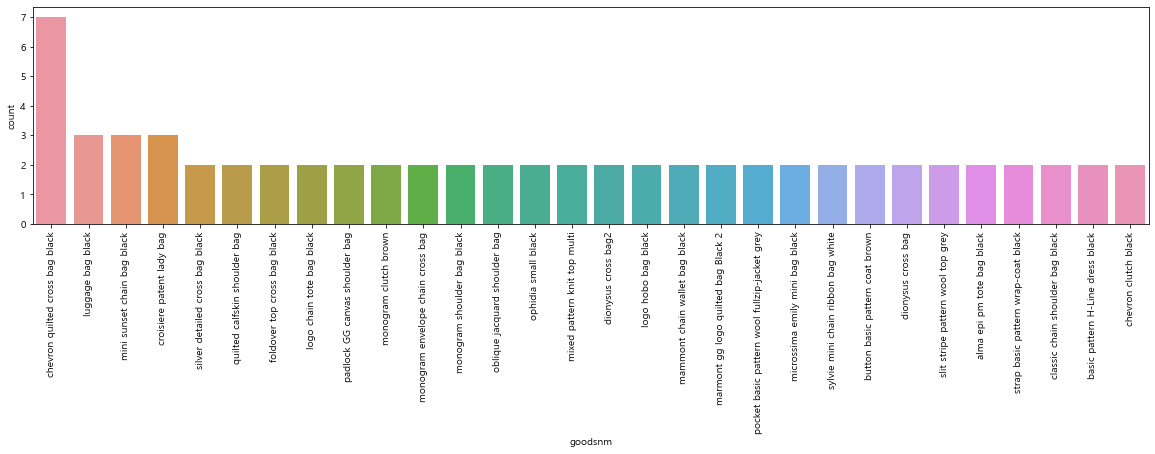

In [452]:
# 1월 인기 제품 (goodsnm)
plt.figure(figsize = (20,4))
plt.xticks(rotation = 90)
g = sns.barplot(x='goodsnm',y='count',data=df_jan_top)

In [453]:
# 2월 인기 제품
df_feb_top.head()

,order_month,goodsnm,sub_type,count,pct
446,2,chevron quilted cross bag black,BA,7,1.5
582,2,padlock GG canvas shoulder bag,BA,5,1.1
451,2,classic clutch black,BA,5,1.1
382,2,boy chanel clutch black,BA,5,1.1
484,2,epi tote bag black,BA,4,0.9


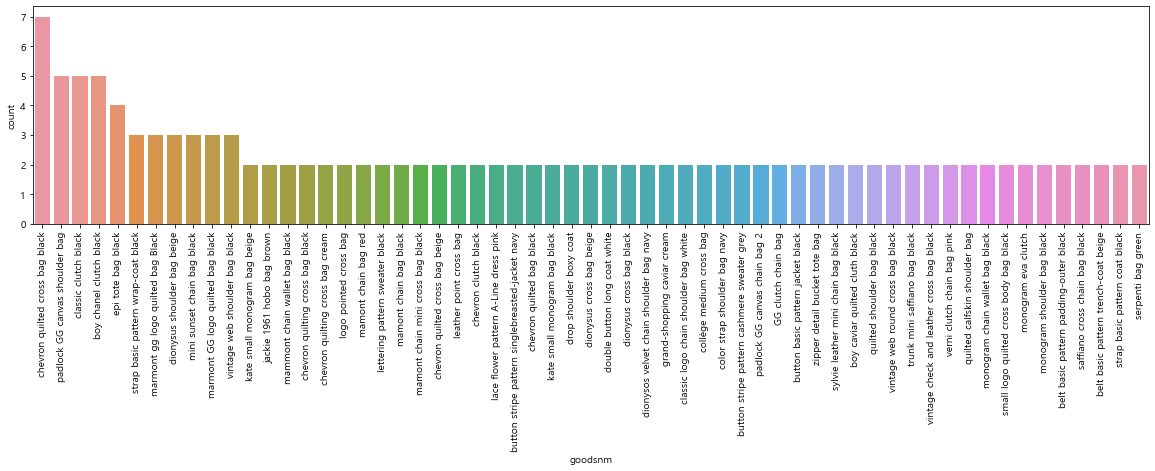

In [454]:
# 2월 인기 제품 (goodsnm)
plt.figure(figsize = (20,4))
plt.xticks(rotation = 90)
g = sns.barplot(x='goodsnm',y='count',data=df_feb_top)

In [455]:
# 3월 인기 제품
df_mar_top.head()

,order_month,goodsnm,sub_type,count,pct
861,3,chevron quilted cross bag black,BA,9,1.4
867,3,classic clutch black,BA,7,1.1
790,3,boy chanel clutch black,BA,6,0.9
913,3,flap cross bag black,BA,6,0.9
889,3,dionysus cross bag beige,BA,4,0.6


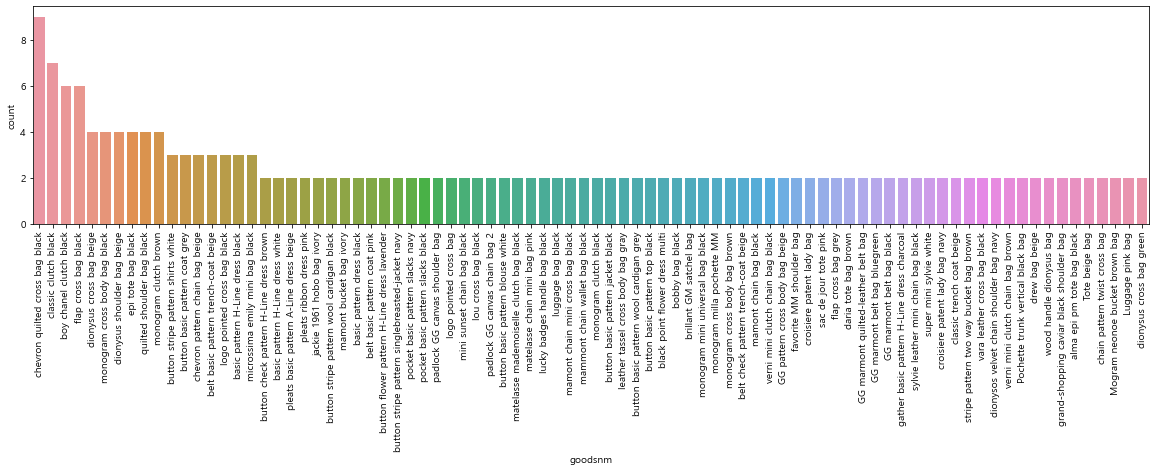

In [456]:
# 3월 인기 제품 (goodsnm)
plt.figure(figsize = (20,4))
plt.xticks(rotation = 90)
g = sns.barplot(x='goodsnm',y='count',data=df_mar_top)

In [457]:
print(f'1월에 2건 이상 대여된 제품 : {df_jan_top.shape[0]}개')
print(f'2월에 2건 이상 대여된 제품 : {df_feb_top.shape[0]}개')
print(f'3월에 2건 이상 대여된 제품 : {df_mar_top.shape[0]}개')

1월에 2건 이상 대여된 제품 : 30개
2월에 2건 이상 대여된 제품 : 59개
3월에 2건 이상 대여된 제품 : 84개


#### ⚡<b>인사이트</b>⚡
- 월별 가장 인기가 많았던 제품은 'Saint Laurent' 브랜드의 'chevron quilted cross bag black'으로, 홈페이지 조회시 총 5개 제품이 등록되어 있음
- 월별 Top 5는 모두 가방 제품
- 대여 건수가 2 이상이었던 제품 개수는 1->3월로 갈수록 30->59->84개로 늘어남
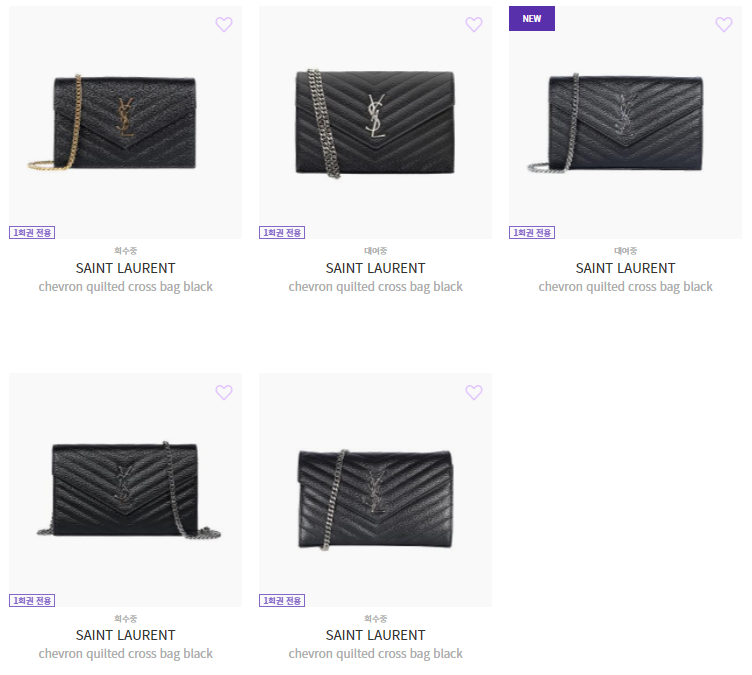

### 3) 유저별 대여제품 건수

In [458]:
# order_month, user로 groupby
df_monthly_user = df.groupby(['order_month', 'user'])['p_type'].count().reset_index().sort_values(
    by = 'p_type', ascending = False).rename(columns = {'p_type' : 'count'})
df_monthly_user

,order_month,user,count
952,3,a1149461,11
969,3,a1149583,10
153,1,a1142677,9
183,1,a1143701,7
1220,3,a189404,7
...,...,...,...
442,2,a1145380,1
441,2,a1145376,1
440,2,a1145353,1
439,2,a1145346,1


In [459]:
# 월별 대여 건수가 2 이상이었던 활성유저 확인
df_jan = df_monthly_user[df_monthly_user['order_month'] == 1]
df_feb = df_monthly_user[df_monthly_user['order_month'] == 2]
df_mar = df_monthly_user[df_monthly_user['order_month'] == 3]

df_jan['pct'] = df_jan['count'] / np.sum(df_jan['count']) * 100
df_feb['pct'] = df_feb['count'] / np.sum(df_feb['count']) * 100
df_mar['pct'] = df_mar['count'] / np.sum(df_mar['count']) * 100

df_jan_top = df_jan[df_jan['count'] != 1]
df_feb_top = df_feb[df_feb['count'] != 1]
df_mar_top = df_mar[df_mar['count'] != 1]

In [460]:
# 1월 활성유저
df_jan_top.head()

,order_month,user,count,pct
153,1,a1142677,9,2.4
183,1,a1143701,7,1.9
104,1,a1140758,5,1.3
80,1,a1139028,4,1.1
154,1,a1142679,4,1.1


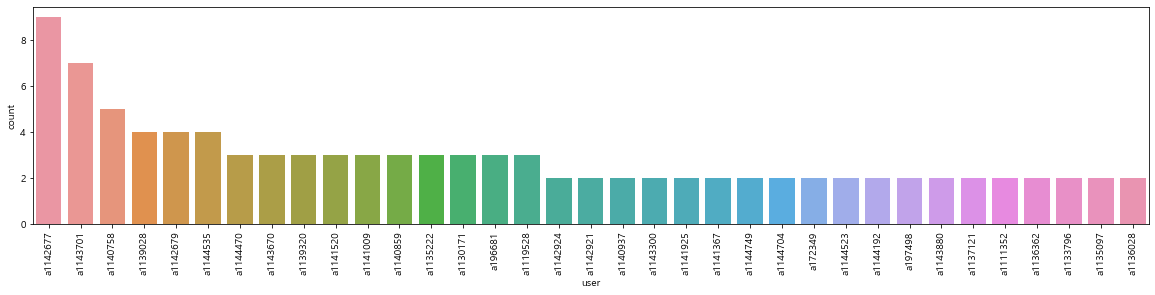

In [461]:
# 1월 활성유저
plt.figure(figsize = (20,4))
plt.xticks(rotation = 90)
g = sns.barplot(x='user',y='count',data=df_jan_top)

In [462]:
# 2월 활성유저
df_feb_top.head()

,order_month,user,count,pct
346,2,a1129550,6,1.3
515,2,a1146366,4,0.9
572,2,a1146852,4,0.9
361,2,a1139388,4,0.9
475,2,a1145686,3,0.7


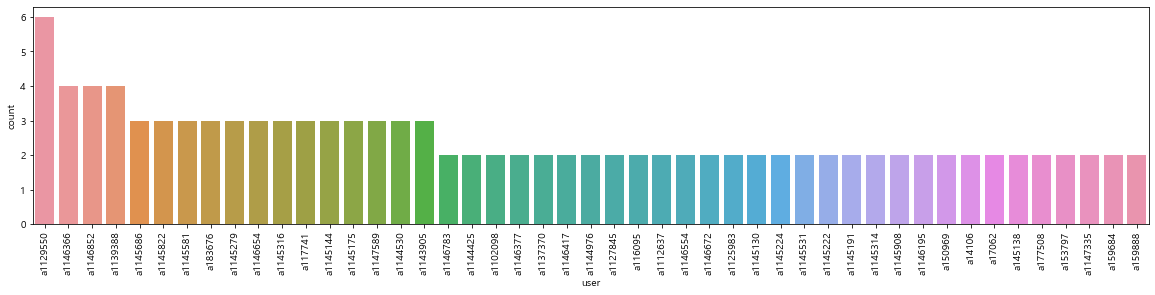

In [463]:
# 2월 활성유저
plt.figure(figsize = (20,4))
plt.xticks(rotation = 90)
g = sns.barplot(x='user',y='count',data=df_feb_top)

In [464]:
# 3월 활성유저
df_mar_top.head()

,order_month,user,count,pct
952,3,a1149461,11,1.7
969,3,a1149583,10,1.6
1220,3,a189404,7,1.1
962,3,a1149542,6,0.9
1216,3,a187924,6,0.9


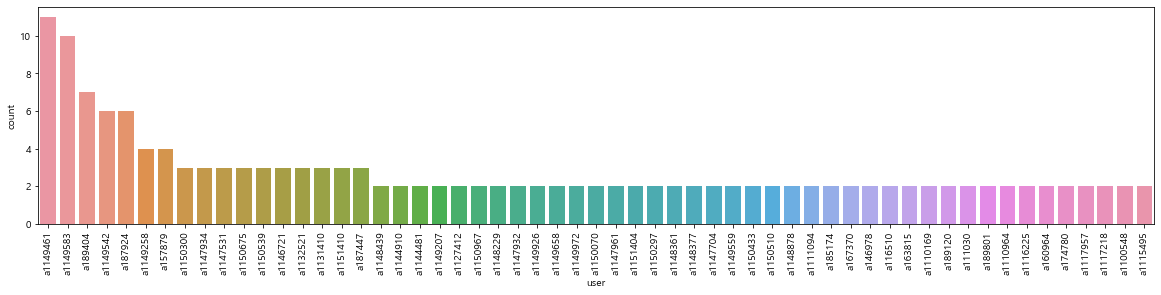

In [465]:
# 3월 활성유저
plt.figure(figsize = (20,4))
plt.xticks(rotation = 90)
g = sns.barplot(x='user',y='count',data=df_mar_top)

In [466]:
print(f'1월에 2건 이상 대여한 유저 : {df_jan_top.shape[0]}명')
print(f'2월에 2건 이상 대여한 유저 : {df_feb_top.shape[0]}명')
print(f'3월에 2건 이상 대여한 유저 : {df_mar_top.shape[0]}명')

1월에 2건 이상 대여한 유저 : 35명
2월에 2건 이상 대여한 유저 : 47명
3월에 2건 이상 대여한 유저 : 57명


In [467]:
jan_over4 = df_jan_top[df_jan_top['count']>=4].shape[0]
feb_over4 = df_feb_top[df_feb_top['count']>=4].shape[0]
mar_over4 = df_mar_top[df_mar_top['count']>=4].shape[0]

jan_over4_pct = round(df_jan_top[df_jan_top['count']>=4].shape[0] / df_jan_top.shape[0],2)*100
feb_over4_pct = round(df_feb_top[df_feb_top['count']>=4].shape[0] / df_feb_top.shape[0],2)*100
mar_over4_pct = round(df_mar_top[df_mar_top['count']>=4].shape[0] / df_mar_top.shape[0],2)*100

print(f'1월에 4건 이상 대여한 유저 : {jan_over4}명 ({jan_over4_pct}%)')
print(f'2월에 4건 이상 대여한 유저 : {feb_over4}명 ({feb_over4_pct}%)')
print(f'3월에 4건 이상 대여한 유저 : {mar_over4}명 ({mar_over4_pct}%)')

1월에 4건 이상 대여한 유저 : 6명 (17.0%)
2월에 4건 이상 대여한 유저 : 4명 (9.0%)
3월에 4건 이상 대여한 유저 : 7명 (12.0%)


#### ⚡<b>인사이트</b>⚡
- 주어진 데이터셋은 각 유저가 서비스를 처음으로 사용했을 때의 주문내역에 대한 것으로, 1,2,3월로 구분시 중복되는 유저는 없음
- 월 대여가 2건 이상인 유저는 1->3월로 갈수록 35->47->57명으로 늘어나는 추세이나, 4건 이상인 유저는 감소하는 구간도 발생

### 4) 주문요일
- Monday - 0 / Sunday - 6

In [468]:
# order_month, order_dayofweek로 groupby
df_monthly_dayofweek = df.groupby(['order_month', 'order_dayofweek'])['p_type'].count().reset_index().sort_values(
    by = 'p_type', ascending = False).rename(columns = {'p_type' : 'count'})
df_monthly_dayofweek

,order_month,order_dayofweek,count
16,3,2,184
15,3,1,130
17,3,3,100
8,2,1,98
10,2,3,93
3,1,3,92
14,3,0,87
9,2,2,81
11,2,4,73
18,3,4,70


In [469]:
# 월별 요일 데이터 확인
df_jan = df_monthly_dayofweek[df_monthly_dayofweek['order_month'] == 1]
df_feb = df_monthly_dayofweek[df_monthly_dayofweek['order_month'] == 2]
df_mar = df_monthly_dayofweek[df_monthly_dayofweek['order_month'] == 3]

df_jan['pct'] = df_jan['count'] / np.sum(df_jan['count']) * 100
df_feb['pct'] = df_feb['count'] / np.sum(df_feb['count']) * 100
df_mar['pct'] = df_mar['count'] / np.sum(df_mar['count']) * 100

In [470]:
# 1월 요일별 대여건수
df_jan

,order_month,order_dayofweek,count,pct
3,1,3,92,24.4
2,1,2,67,17.8
1,1,1,63,16.7
4,1,4,52,13.8
0,1,0,51,13.5
6,1,6,33,8.8
5,1,5,19,5.0


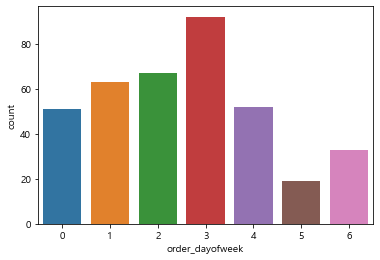

In [471]:
# 1월 요일별 대여건수
g = sns.barplot(x='order_dayofweek',y='count',data=df_jan)

In [472]:
# 2월 요일별 대여건수
df_feb

,order_month,order_dayofweek,count,pct
8,2,1,98,21.5
10,2,3,93,20.4
9,2,2,81,17.8
11,2,4,73,16.0
7,2,0,65,14.3
13,2,6,30,6.6
12,2,5,15,3.3


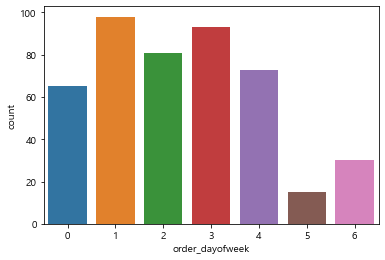

In [473]:
# 2월 요일별 대여건수
g = sns.barplot(x='order_dayofweek',y='count',data=df_feb)

In [474]:
# 3월 요일별 대여건수
df_mar

,order_month,order_dayofweek,count,pct
16,3,2,184,28.8
15,3,1,130,20.3
17,3,3,100,15.6
14,3,0,87,13.6
18,3,4,70,11.0
20,3,6,40,6.3
19,3,5,28,4.4


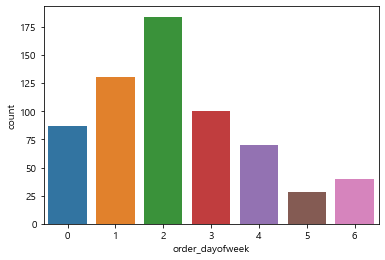

In [475]:
# 3월 요일별 대여건수
g = sns.barplot(x='order_dayofweek',y='count',data=df_mar)

In [476]:
jan_weekday = df_jan[df_jan['order_dayofweek'].isin([0,1,2,3,4])]['count'].sum()
jan_weekend = df_jan[df_jan['order_dayofweek'].isin([5,6])]['count'].sum()
jan_weekend_pct = round(df_jan[df_jan['order_dayofweek'].isin([5,6])]['pct'].sum(),1)

feb_weekday = df_feb[df_feb['order_dayofweek'].isin([0,1,2,3,4])]['count'].sum()
feb_weekend = df_feb[df_feb['order_dayofweek'].isin([5,6])]['count'].sum()
feb_weekend_pct = round(df_feb[df_feb['order_dayofweek'].isin([5,6])]['pct'].sum(),1)

mar_weekday = df_mar[df_mar['order_dayofweek'].isin([0,1,2,3,4])]['count'].sum()
mar_weekend = df_mar[df_mar['order_dayofweek'].isin([5,6])]['count'].sum()
mar_weekend_pct = round(df_mar[df_mar['order_dayofweek'].isin([5,6])]['pct'].sum(),1)

print(f'1월 평일 대여건수 : {jan_weekday}건, 주말 대여건수 : {jan_weekend}건, 주말 비중 : {jan_weekend_pct}%')
print(f'2월 평일 대여건수 : {feb_weekday}건, 주말 대여건수 : {feb_weekend}건, 주말 비중 : {feb_weekend_pct}%')
print(f'3월 평일 대여건수 : {mar_weekday}건, 주말 대여건수 : {mar_weekend}건, 주말 비중 : {mar_weekend_pct}%')

1월 평일 대여건수 : 325건, 주말 대여건수 : 52건, 주말 비중 : 13.8%
2월 평일 대여건수 : 410건, 주말 대여건수 : 45건, 주말 비중 : 9.9%
3월 평일 대여건수 : 571건, 주말 대여건수 : 68건, 주말 비중 : 10.6%


#### ⚡<b>인사이트</b>⚡
- 매월 화~목요일 대여 건수가 높으며, 주말은 상대적으로 낮음
- 주말에 사용하려는 제품을 주중에 주문하려는 수요가 있는 것으로 추측해볼 수 있음

### 5) 이용권
- 4days / 7days

In [477]:
# order_month, p_type로 groupby
df_monthly_ptype = df.groupby(['order_month', 'p_type'])['sub_type'].count().reset_index().sort_values(
    by = 'sub_type', ascending = False).rename(columns = {'sub_type' : 'count'})
df_monthly_ptype

,order_month,p_type,count
4,3,4days,381
2,2,4days,276
5,3,7days,258
0,1,4days,237
3,2,7days,179
1,1,7days,140


In [478]:
# 월별 p_type 확인
df_jan = df_monthly_ptype[df_monthly_ptype['order_month'] == 1]
df_feb = df_monthly_ptype[df_monthly_ptype['order_month'] == 2]
df_mar = df_monthly_ptype[df_monthly_ptype['order_month'] == 3]

df_jan['pct'] = df_jan['count'] / np.sum(df_jan['count']) * 100
df_feb['pct'] = df_feb['count'] / np.sum(df_feb['count']) * 100
df_mar['pct'] = df_mar['count'] / np.sum(df_mar['count']) * 100

In [479]:
# 1월 p_type
df_jan

,order_month,p_type,count,pct
0,1,4days,237,62.9
1,1,7days,140,37.1


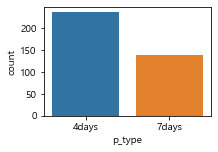

In [480]:
# 1월 p_type
plt.figure(figsize = (3,2))
g = sns.barplot(x='p_type',y='count',data=df_jan)

In [481]:
# 2월 p_type
df_feb

,order_month,p_type,count,pct
2,2,4days,276,60.7
3,2,7days,179,39.3


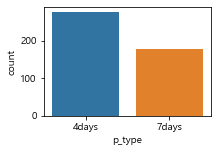

In [482]:
# 2월 p_type
plt.figure(figsize = (3,2))
g = sns.barplot(x='p_type',y='count',data=df_feb)

In [483]:
# 3월 p_type
df_mar

,order_month,p_type,count,pct
4,3,4days,381,59.6
5,3,7days,258,40.4


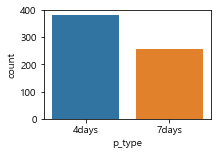

In [484]:
# 3월 p_type
plt.figure(figsize = (3,2))
g = sns.barplot(x='p_type',y='count',data=df_mar)

In [485]:
jan_ptype = df_jan.loc[df_jan['p_type'] == '4days', 'count'].sum()
jan_4days_pct = round(df_jan.loc[df_jan['p_type'] == '4days', 'pct'].sum(),1)

feb_ptype = df_feb.loc[df_feb['p_type'] == '4days', 'count'].sum()
feb_4days_pct = round(df_feb.loc[df_feb['p_type'] == '4days', 'pct'].sum(),1)

mar_ptype = df_mar.loc[df_mar['p_type'] == '4days', 'count'].sum()
mar_4days_pct = round(df_mar.loc[df_mar['p_type'] == '4days', 'pct'].sum(),1)

print(f'1월 p_type : {jan_ptype}건, 4days 비중 : {jan_4days_pct}%')
print(f'2월 p_type : {feb_ptype}건, 4days 비중 : {feb_4days_pct}%')
print(f'3월 p_type : {mar_ptype}건, 4days 비중 : {mar_4days_pct}%')

1월 p_type : 237건, 4days 비중 : 62.9%
2월 p_type : 276건, 4days 비중 : 60.7%
3월 p_type : 381건, 4days 비중 : 59.6%


#### ⚡<b>인사이트</b>⚡
- 1->3월로 가면서 4days 대여 비중이 줄어드는 추세
- 7days 이용권의 단가가 높긴 하나, 인기있는 제품은 회전율을 높이는 것이 이익일 수 있음
- 회전이 활발한 제품인지 여부, 세탁에 소요되는 일수, 왕복배송에 소요되는 일수, 배송비 등을 종합적으로 고려하여 제품별로 4일권, 7일권 중에 어떤 타입이 더 유리한지 파악하여 마케팅에 활용할 필요가 있음

ex) 4일권 49,000원, 7일권 59,000원인 인기제품이 30일간 대여되는 상황 (기간 공백없이 연달아 대여)<br>
    세탁에 1일, 왕복배송에는 3일, 5천원 배송비가 든다고 가정하면 7일권 판매가 근소한 차이로 유리함

|p_type|매출|왕복배송비|1회 대여시 소요일|30일간 대여가능 횟수|수익|
|------|----|----------|-----------------|-------------|----|
|4일권|49000|5000|8일|30일 / 8일 = 3.75회|(44000-5000)* 3.75 = 146250원|
|7일권|59000|5000|11일|30일 / 11일 = 2.73회|(59000-5000) * 2.73 = 147420원|

### 6) 제품 카테고리
- BA – 가방 / O – 아우터 / D – 드레스 / T – 상의 / B – 하의 / TP – 투피스 

In [486]:
# order_month, sub_type로 groupby
df_monthly_subtype = df.groupby(['order_month', 'sub_type'])['p_type'].count().reset_index().sort_values(
    by = 'p_type', ascending = False).rename(columns = {'p_type' : 'count'})
df_monthly_subtype

,order_month,sub_type,count
13,3,BA,310
7,2,BA,234
1,1,BA,148
14,3,D,128
9,2,O,97
15,3,O,87
3,1,O,83
8,2,D,69
16,3,T,65
2,1,D,64


In [487]:
# 월별 sub_type 확인
df_jan = df_monthly_subtype[df_monthly_subtype['order_month'] == 1]
df_feb = df_monthly_subtype[df_monthly_subtype['order_month'] == 2]
df_mar = df_monthly_subtype[df_monthly_subtype['order_month'] == 3]

df_jan['pct'] = df_jan['count'] / np.sum(df_jan['count']) * 100
df_feb['pct'] = df_feb['count'] / np.sum(df_feb['count']) * 100
df_mar['pct'] = df_mar['count'] / np.sum(df_mar['count']) * 100

In [488]:
# 1월 sub_type
df_jan

,order_month,sub_type,count,pct
1,1,BA,148,39.3
3,1,O,83,22.0
2,1,D,64,17.0
4,1,T,60,15.9
0,1,B,11,2.9
5,1,TP,11,2.9


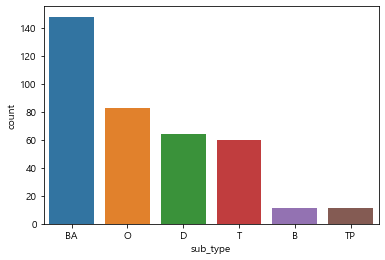

In [489]:
# 1월 sub_type
g = sns.barplot(x='sub_type',y='count',data=df_jan)

In [490]:
# 2월 sub_type
df_feb

,order_month,sub_type,count,pct
7,2,BA,234,51.4
9,2,O,97,21.3
8,2,D,69,15.2
10,2,T,39,8.6
6,2,B,9,2.0
11,2,TP,7,1.5


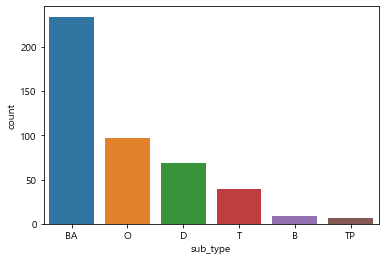

In [491]:
# 2월 sub_type
g = sns.barplot(x='sub_type',y='count',data=df_feb)

In [492]:
# 3월 sub_type
df_mar

,order_month,sub_type,count,pct
13,3,BA,310,48.5
14,3,D,128,20.0
15,3,O,87,13.6
16,3,T,65,10.2
12,3,B,38,5.9
17,3,TP,11,1.7


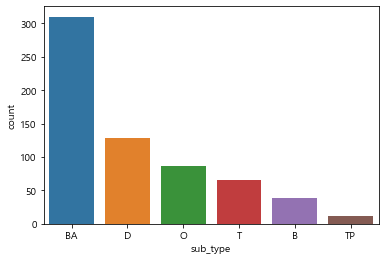

In [493]:
# 3월 sub_type
g = sns.barplot(x='sub_type',y='count',data=df_mar)

In [494]:
# BA 기준 월별 변화 확인
jan_subtype = df_jan.loc[df_jan['sub_type'] == 'BA', 'count'].sum()
jan_BA_pct = round(df_jan.loc[df_jan['sub_type'] == 'BA', 'pct'].sum(),1)
feb_subtype = df_feb.loc[df_feb['sub_type'] == 'BA', 'count'].sum()
feb_BA_pct = round(df_feb.loc[df_feb['sub_type'] == 'BA', 'pct'].sum(),1)
mar_subtype = df_mar.loc[df_mar['sub_type'] == 'BA', 'count'].sum()
mar_BA_pct = round(df_mar.loc[df_mar['sub_type'] == 'BA', 'pct'].sum(),1)

print(f'1월 sub_type : {jan_subtype}건, 가방 비중 : {jan_BA_pct}%')
print(f'2월 sub_type : {feb_subtype}건, 가방 비중 : {feb_BA_pct}%')
print(f'3월 sub_type : {mar_subtype}건, 가방 비중 : {mar_BA_pct}%')

1월 sub_type : 148건, 가방 비중 : 39.3%
2월 sub_type : 234건, 가방 비중 : 51.4%
3월 sub_type : 310건, 가방 비중 : 48.5%


In [495]:
# D 기준 월별 변화 확인
jan_subtype = df_jan.loc[df_jan['sub_type'] == 'D', 'count'].sum()
jan_D_pct = round(df_jan.loc[df_jan['sub_type'] == 'D', 'pct'].sum(),1)
feb_subtype = df_feb.loc[df_feb['sub_type'] == 'D', 'count'].sum()
feb_D_pct = round(df_feb.loc[df_feb['sub_type'] == 'D', 'pct'].sum(),1)
mar_subtype = df_mar.loc[df_mar['sub_type'] == 'D', 'count'].sum()
mar_D_pct = round(df_mar.loc[df_mar['sub_type'] == 'D', 'pct'].sum(),1)

print(f'1월 sub_type : {jan_subtype}건, 드레스 비중 : {jan_D_pct}%')
print(f'2월 sub_type : {feb_subtype}건, 드레스 비중 : {feb_D_pct}%')
print(f'3월 sub_type : {mar_subtype}건, 드레스 비중 : {mar_D_pct}%')

1월 sub_type : 64건, 드레스 비중 : 17.0%
2월 sub_type : 69건, 드레스 비중 : 15.2%
3월 sub_type : 128건, 드레스 비중 : 20.0%


In [498]:
# O 기준 월별 변화 확인
jan_subtype = df_jan.loc[df_jan['sub_type'] == 'O', 'count'].sum()
jan_O_pct = round(df_jan.loc[df_jan['sub_type'] == 'O', 'pct'].sum(),1)
feb_subtype = df_feb.loc[df_feb['sub_type'] == 'O', 'count'].sum()
feb_O_pct = round(df_feb.loc[df_feb['sub_type'] == 'O', 'pct'].sum(),1)
mar_subtype = df_mar.loc[df_mar['sub_type'] == 'O', 'count'].sum()
mar_O_pct = round(df_mar.loc[df_mar['sub_type'] == 'O', 'pct'].sum(),1)

print(f'1월 sub_type : {jan_subtype}건, 아우터 비중 : {jan_O_pct}%')
print(f'2월 sub_type : {feb_subtype}건, 아우터 비중 : {feb_O_pct}%')
print(f'3월 sub_type : {mar_subtype}건, 아우터 비중 : {mar_O_pct}%')

1월 sub_type : 83건, 아우터 비중 : 22.0%
2월 sub_type : 97건, 아우터 비중 : 21.3%
3월 sub_type : 87건, 아우터 비중 : 13.6%


In [499]:
# T 기준 월별 변화 확인
jan_subtype = df_jan.loc[df_jan['sub_type'] == 'T', 'count'].sum()
jan_T_pct = round(df_jan.loc[df_jan['sub_type'] == 'T', 'pct'].sum(),1)
feb_subtype = df_feb.loc[df_feb['sub_type'] == 'T', 'count'].sum()
feb_T_pct = round(df_feb.loc[df_feb['sub_type'] == 'T', 'pct'].sum(),1)
mar_subtype = df_mar.loc[df_mar['sub_type'] == 'T', 'count'].sum()
mar_T_pct = round(df_mar.loc[df_mar['sub_type'] == 'T', 'pct'].sum(),1)

print(f'1월 sub_type : {jan_subtype}건, 상의 비중 : {jan_T_pct}%')
print(f'2월 sub_type : {feb_subtype}건, 상의 비중 : {feb_T_pct}%')
print(f'3월 sub_type : {mar_subtype}건, 상의 비중 : {mar_T_pct}%')

1월 sub_type : 60건, 상의 비중 : 15.9%
2월 sub_type : 39건, 상의 비중 : 8.6%
3월 sub_type : 65건, 상의 비중 : 10.2%


In [500]:
# B 기준 월별 변화 확인
jan_subtype = df_jan.loc[df_jan['sub_type'] == 'B', 'count'].sum()
jan_B_pct = round(df_jan.loc[df_jan['sub_type'] == 'B', 'pct'].sum(),1)
feb_subtype = df_feb.loc[df_feb['sub_type'] == 'B', 'count'].sum()
feb_B_pct = round(df_feb.loc[df_feb['sub_type'] == 'B', 'pct'].sum(),1)
mar_subtype = df_mar.loc[df_mar['sub_type'] == 'B', 'count'].sum()
mar_B_pct = round(df_mar.loc[df_mar['sub_type'] == 'B', 'pct'].sum(),1)

print(f'1월 sub_type : {jan_subtype}건, 하의 비중 : {jan_B_pct}%')
print(f'2월 sub_type : {feb_subtype}건, 하의 비중 : {feb_B_pct}%')
print(f'3월 sub_type : {mar_subtype}건, 하의 비중 : {mar_B_pct}%')

1월 sub_type : 11건, 하의 비중 : 2.9%
2월 sub_type : 9건, 하의 비중 : 2.0%
3월 sub_type : 38건, 하의 비중 : 5.9%


In [501]:
# TP 기준 월별 변화 확인
jan_subtype = df_jan.loc[df_jan['sub_type'] == 'TP', 'count'].sum()
jan_TP_pct = round(df_jan.loc[df_jan['sub_type'] == 'TP', 'pct'].sum(),1)
feb_subtype = df_feb.loc[df_feb['sub_type'] == 'TP', 'count'].sum()
feb_TP_pct = round(df_feb.loc[df_feb['sub_type'] == 'TP', 'pct'].sum(),1)
mar_subtype = df_mar.loc[df_mar['sub_type'] == 'TP', 'count'].sum()
mar_TP_pct = round(df_mar.loc[df_mar['sub_type'] == 'TP', 'pct'].sum(),1)

print(f'1월 sub_type : {jan_subtype}건, 투피스 비중 : {jan_TP_pct}%')
print(f'2월 sub_type : {feb_subtype}건, 투피스 비중 : {feb_TP_pct}%')
print(f'3월 sub_type : {mar_subtype}건, 투피스 비중 : {mar_TP_pct}%')

1월 sub_type : 11건, 투피스 비중 : 2.9%
2월 sub_type : 7건, 투피스 비중 : 1.5%
3월 sub_type : 11건, 투피스 비중 : 1.7%


#### ⚡<b>인사이트</b>⚡
- 매월 가장 인기있는 sub_type은 가방으로, 브랜드, 제품분석 결과를 봤을 때 명품가방 대여에 대한 수요가 높은 것으로 보임
- 인기있는 가방과 매치할 수 있는 의류를 제안하는 방식으로 크게 주목받지 못했던 의류 아이템의 대여횟수를 늘릴 수 있을 것으로 보임
- 아우터는 1->3월로 가면서 대여횟수 및 비중이 줄어들었으나 D는 2->3월 대여횟수가 크게 늘어남
- 계절과 관계있는 아이템들이 있는 것으로 보이며, 계절성을 활용한 마케팅 전략을 세울 수 있을 것으로 보임

### 6) 앱사용여부
- Y - 사용 / N - 미사용

In [502]:
# order_month, app_yn으로 groupby
df_monthly_app = df.groupby(['order_month', 'app_yn'])['p_type'].count().reset_index().sort_values(
    by = 'p_type', ascending = False).rename(columns = {'p_type' : 'count'})
df_monthly_app

,order_month,app_yn,count
5,3,Y,538
3,2,Y,408
1,1,Y,349
4,3,N,101
2,2,N,47
0,1,N,28


In [503]:
# 월별 app_yn 확인
df_jan = df_monthly_app[df_monthly_app['order_month'] == 1]
df_feb = df_monthly_app[df_monthly_app['order_month'] == 2]
df_mar = df_monthly_app[df_monthly_app['order_month'] == 3]

df_jan['pct'] = df_jan['count'] / np.sum(df_jan['count']) * 100
df_feb['pct'] = df_feb['count'] / np.sum(df_feb['count']) * 100
df_mar['pct'] = df_mar['count'] / np.sum(df_mar['count']) * 100

In [504]:
# 1월 app_yn
df_jan

,order_month,app_yn,count,pct
1,1,Y,349,92.6
0,1,N,28,7.4


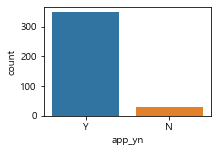

In [505]:
# 1월 app_yn
plt.figure(figsize = (3,2))
g = sns.barplot(x='app_yn',y='count',data=df_jan)

In [506]:
# 2월 app_yn
df_feb

,order_month,app_yn,count,pct
3,2,Y,408,89.7
2,2,N,47,10.3


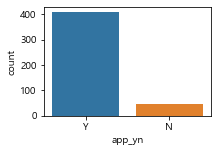

In [507]:
# 2월 app_yn
plt.figure(figsize = (3,2))
g = sns.barplot(x='app_yn',y='count',data=df_feb)

In [508]:
# 3월 app_yn
df_mar

,order_month,app_yn,count,pct
5,3,Y,538,84.2
4,3,N,101,15.8


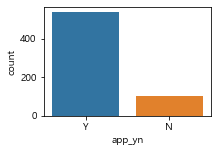

In [509]:
# 3월 app_yn
plt.figure(figsize = (3,2))
g = sns.barplot(x='app_yn',y='count',data=df_mar)

In [510]:
jan_app = df_jan.loc[df_jan['app_yn'] == 'Y', 'count'].sum()
jan_Y_pct = round(df_jan.loc[df_jan['app_yn'] == 'Y', 'pct'].sum(),1)

feb_app = df_feb.loc[df_feb['app_yn'] == 'Y', 'count'].sum()
feb_Y_pct = round(df_feb.loc[df_feb['app_yn'] == 'Y', 'pct'].sum(),1)

mar_app = df_mar.loc[df_mar['app_yn'] == 'Y', 'count'].sum()
mar_Y_pct = round(df_mar.loc[df_mar['app_yn'] == 'Y', 'pct'].sum(),1)

print(f'1월 app_yn : {jan_app}건, 앱이용 비중 : {jan_Y_pct}%')
print(f'2월 app_yn : {feb_app}건, 앱이용 비중 : {feb_Y_pct}%')
print(f'3월 app_yn : {mar_app}건, 앱이용 비중 : {mar_Y_pct}%')

1월 app_yn : 349건, 앱이용 비중 : 92.6%
2월 app_yn : 408건, 앱이용 비중 : 89.7%
3월 app_yn : 538건, 앱이용 비중 : 84.2%


#### ⚡<b>인사이트</b>⚡
- 앱사용자 비중이 늘어날수록 유리할 것으로 보이나(앱푸시 가능, 방문빈도 확보), 1->3월에는 감소하는 추세
- 앱사용도를 높이기 위한 프로모션 전략 활용 필요

### 7) 럭셔리 제품 여부
- 1 - 럭셔리 브랜드 / 0 - 비럭셔리 브랜드

In [517]:
# order_month, brandnm_luxury으로 groupby
df_monthly_luxury = df.groupby('order_month')['p_type','brandnm_luxury'].agg({
    'p_type' : 'count', 'brandnm_luxury' : 'sum'}).reset_index().rename(columns = {'p_type' : 'total', 'brandnm_luxury' : 'luxury'})
df_monthly_luxury

,order_month,total,luxury
0,1,377,180
1,2,455,248
2,3,639,334


In [518]:
# 월별 luxury제품 비중 확인
df_monthly_luxury['pct'] = df_monthly_luxury['luxury'] / df_monthly_luxury['total'] * 100
df_monthly_luxury

,order_month,total,luxury,pct
0,1,377,180,47.7
1,2,455,248,54.5
2,3,639,334,52.3


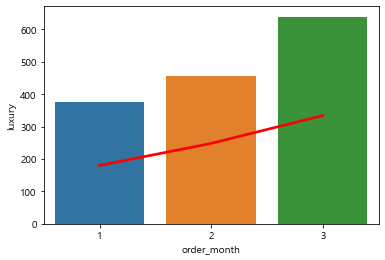

In [534]:
# 럭셔리 제품 비중
ax = plt.subplots()
ax = sns.barplot(x = df_monthly_luxury['order_month'], y=df_monthly_luxury['total'])
ax = sns.pointplot(x = df_monthly_luxury['order_month'], y = df_monthly_luxury['luxury'], color = 'red', sort = False)

In [540]:
# user, brandnm_luxury으로 groupby
df_user_luxury = df.groupby('user')['brandnm_luxury'].agg(['sum', 'count']).reset_index().rename(
    columns = {'sum' : 'luxury', 'count' : 'total'}).sort_values(by = 'luxury', ascending = False)
df_user_luxury

,user,luxury,total
276,a1142679,3,4
317,a1143701,3,7
1202,a187924,3,6
368,a1144530,2,3
195,a1139388,2,4
...,...,...,...
580,a1146654,0,3
583,a1146675,0,1
585,a1146692,0,1
587,a1146695,0,1


In [543]:
# 유저별 럭셔리 제품 대여비중 확인
df_user_luxury['pct'] = round(df_user_luxury['luxury'] / df_user_luxury['total'] * 100, 1)
df_user_luxury

,user,luxury,total,pct
276,a1142679,3,4,75.0
317,a1143701,3,7,42.9
1202,a187924,3,6,50.0
368,a1144530,2,3,66.7
195,a1139388,2,4,50.0
...,...,...,...,...
580,a1146654,0,3,0.0
583,a1146675,0,1,0.0
585,a1146692,0,1,0.0
587,a1146695,0,1,0.0


<AxesSubplot:>

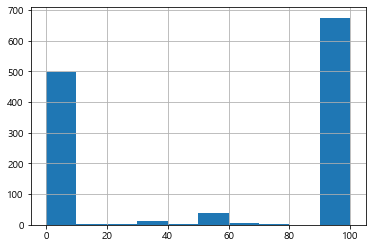

In [544]:
# 전체 대여제품 중 럭셔리가 차지하는 비중이 높은 유저, 낮은 유저로 확연히 구분됨
df_user_luxury['pct'].hist()

### ⚡<b>인사이트</b>⚡
- 전체 대여제품 중 럭셔리 제품 비중은 월마다 차이는 있지만 50% 내외에서 유지되는 것으로 확인됨
- 유저별 럭셔리 제품 선호여부는 확연한 차이를 보여, 유저 특성을 반영한 맞춤형 프로모션을 활용할 수 있을 것으로 보임

# ⚡제안사항⚡
## 브랜드
- 인기 브랜드와의 콜라보 마케팅 전략 ("클로젯셰어에서 구찌 제품을 5회 이상 대여하신 분들께 드리는 신제품 체험 기회!")

## 제품
- 인기 제품의 셰어링 등록을 유도하는 마케팅 전략 ("옷장에서 쉬고 있는 생로랑 크로스백, 클로젯셰어에서 열일하게 하세요!")
- 인기 제품은 회전율이 최대로 운영되고 있는지 물류, 배송상황 지속 점검

## 유저
- 1회 주문시 대여 제품수를 늘릴 수 있는 인센티브 전략
- 대여하는 제품수가 많아질수록 높아지는 포인트 적립, 할인율, 늘어나는 대여기간 등

## 주문요일
- 주말 주문 수량을 늘릴 수 있는 마케팅 전략 ("회사에서 패피가 되고싶다면? 클로젯셰어에서 다음주에 입을 오피스룩 대여하세요!")

## 이용권
- 제품별로 4일권, 7일권 중 어떤 이용권으로 대여하는 것이 수익 제고에 유리한지 파악하여 마케팅에 활용

## 제품 카테고리
- 인기있는 가방 제품에 매치할 수 있는 의류 아이템 코디 제안 ("보이 샤넬 클러치가 가장 빛나는 코디, 클로젯셰어에서 한번에 완성하세요!")
- 제품의 계절성을 고려한 마케팅 전략 ("결혼식 사진마다 같은 옷 입고 계셨다면? 클로젯셰어에서 특별한 날을 위한 코디를 준비하세요!")

## 앱 사용여부
- 앱사용도를 높이기 위한 마케팅 전략 (앱에서만 사용 가능한 쿠폰 발행 등)

## 럭셔리 제품 여부
- 유저별 선호 브랜드 제품을 더 자주 노출시키는 마케팅 전략